# Dealing with Missing & Duplicated Data

#### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np
# Data Manipulation
import pandas as pd
# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#### Missing Data

In [2]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)

In [4]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8' for col in cols}))


    return (df
     .rename(columns={'Seq.':'Seq'})    # 1
     .rename(columns={k:v.replace(' ', '_') for k,v in
        {'Bg': 'Background',
         'PL': 'Party leadership', 'CAb': 'Communication ability',
         'RC': 'Relations with Congress', 'CAp': 'Court appointments',
         'HE': 'Handling of economy', 'L': 'Luck',
         'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
         'EAp': 'Executive appointments', 'OA': 'Overall ability',
         'Im': 'Imagination', 'DA': 'Domestic accomplishments',
         'Int': 'Integrity', 'EAb': 'Executive ability',
         'FPA': 'Foreign policy accomplishments',
         'LA': 'Leadership ability',
         'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
         'EV': "Experts' view", 'O': 'Overall'}.items()})
     .astype({'Party':'category'})  # 2
     .pipe(int64_to_uint8)  # 3
     .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8') # 4
                 .sum(axis=1).rank(method='dense').astype('uint8')),
             Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                 labels='1st 2nd 3rd 4th'.split())
            )
    )

In [5]:
pres = tweak_siena_pres(df)

In [6]:
pres.isna()

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
pres[pres.Integrity.isna()]

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile


In [8]:
pres.isna().sum()

Seq                               0
President                         0
Party                             0
Background                        0
Imagination                       0
Integrity                         0
Intelligence                      0
Luck                              0
Willing_to_take_risks             0
Ability_to_compromise             0
Executive_ability                 0
Leadership_ability                0
Communication_ability             0
Overall_ability                   0
Party_leadership                  0
Relations_with_Congress           0
Court_appointments                0
Handling_of_economy               0
Executive_appointments            0
Domestic_accomplishments          0
Foreign_policy_accomplishments    0
Avoid_crucial_mistakes            0
Experts'_view                     0
Overall                           0
Average_rank                      0
Quartile                          0
dtype: int64

In [9]:
pres.isna().mean()

Seq                               0.0
President                         0.0
Party                             0.0
Background                        0.0
Imagination                       0.0
Integrity                         0.0
Intelligence                      0.0
Luck                              0.0
Willing_to_take_risks             0.0
Ability_to_compromise             0.0
Executive_ability                 0.0
Leadership_ability                0.0
Communication_ability             0.0
Overall_ability                   0.0
Party_leadership                  0.0
Relations_with_Congress           0.0
Court_appointments                0.0
Handling_of_economy               0.0
Executive_appointments            0.0
Domestic_accomplishments          0.0
Foreign_policy_accomplishments    0.0
Avoid_crucial_mistakes            0.0
Experts'_view                     0.0
Overall                           0.0
Average_rank                      0.0
Quartile                          0.0
dtype: float

In [10]:
pres.drop_duplicates()

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,...,25,31,26,29,27,24,28,25,25,3rd
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,42,41,40,42,44,37,39,39,38,4th
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,38,34,36,36,26,32,36,37,37,4th


In [12]:
pres.drop_duplicates(subset='Party')

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,42,41,40,42,44,37,39,39,38,4th
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,3,4,2,1,6,2,1,3,3,1st


In [13]:
pres.drop_duplicates(subset='Party', keep='last')

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,38,34,36,36,26,32,36,37,37,4th
13,13,Millard Fillmore,Whig,40,37,36,38,35,38,32,...,39,37,37,37,37,33,37,38,39,4th
43,44,Barack Obama,Democratic,24,11,13,9,15,23,16,...,14,10,13,13,20,10,11,17,17,2nd
44,45,Donald Trump,Republican,43,40,44,44,10,25,42,...,40,39,44,40,42,41,42,42,42,4th


In [14]:
pres.drop_duplicates(subset='Party', keep=False)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd


In [17]:
(pres
 .assign(first_in_party_seq=lambda df_:df_.Party != df_.Party.shift(1),
        )
 .loc[lambda df_:df_.first_in_party_seq]
)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile,first_in_party_seq
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,2,2,1,2,1,1,1st,True
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,13,15,19,13,16,10,14,13,2nd,True
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,20,4,6,9,7,5,5,5,1st,True
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,25,25,17,23,20,19,19,19,2nd,True
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,41,40,42,44,37,39,39,38,4th,True
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,34,36,36,26,32,36,37,37,4th,True
11,11,James K. Polk,Democratic,19,10,23,23,9,7,18,...,15,16,12,8,8,13,12,11,1st,True
12,12,Zachary Taylor,Whig,30,26,22,32,37,24,26,...,27,33,27,30,26,30,30,30,3rd,True
14,14,Franklin Pierce,Democratic,38,39,38,40,39,38,39,...,40,39,41,39,38,40,40,41,4th,True
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,4,2,1,6,2,1,3,3,1st,True


# Sorting Columns & Indexes

In [18]:
pres.sort_values(by='Party')

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
22,22/24,Grover Cleveland,Democratic,26,23,26,27,19,27,22,...,20,21,23,23,21,15,22,23,23,3rd
31,32,Franklin D. Roosevelt,Democratic,6,3,16,12,5,3,4,...,2,2,3,3,1,4,3,2,2,1st
17,17,Andrew Johnson,Democratic,42,42,41,42,40,34,43,...,44,43,42,43,41,43,43,44,44,4th
32,33,Harry S. Truman,Democratic,31,16,9,21,12,8,12,...,17,8,10,7,4,9,7,9,9,1st
15,15,James Buchanan,Democratic,36,43,40,39,42,41,40,...,43,42,43,44,43,44,44,43,43,4th
14,14,Franklin Pierce,Democratic,38,39,38,40,39,38,39,...,41,40,39,41,39,38,40,40,41,4th
34,35,John F. Kennedy,Democratic,14,5,31,11,31,9,8,...,12,7,6,15,17,18,12,10,10,1st
35,36,Lyndon B. Johnson,Democratic,15,11,34,22,25,10,9,...,8,12,8,5,40,35,17,16,16,2nd
11,11,James K. Polk,Democratic,19,10,23,23,9,7,18,...,22,15,16,12,8,8,13,12,11,1st
38,39,Jimmy Carter,Democratic,25,19,3,15,38,27,29,...,19,38,22,28,25,34,26,26,27,3rd


In [19]:
(pres
  .sort_values(by=['Party', 'Average_rank'],
      ascending=[True, False])
)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
17,17,Andrew Johnson,Democratic,42,42,41,42,40,34,43,...,44,43,42,43,41,43,43,44,44,4th
15,15,James Buchanan,Democratic,36,43,40,39,42,41,40,...,43,42,43,44,43,44,44,43,43,4th
14,14,Franklin Pierce,Democratic,38,39,38,40,39,38,39,...,41,40,39,41,39,38,40,40,41,4th
38,39,Jimmy Carter,Democratic,25,19,3,15,38,27,29,...,19,38,22,28,25,34,26,26,27,3rd
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,...,25,31,26,29,27,24,28,25,25,3rd
22,22/24,Grover Cleveland,Democratic,26,23,26,27,19,27,22,...,20,21,23,23,21,15,22,23,23,3rd
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
43,44,Barack Obama,Democratic,24,11,13,9,15,23,16,...,14,10,13,13,20,10,11,17,17,2nd
35,36,Lyndon B. Johnson,Democratic,15,11,34,22,25,10,9,...,8,12,8,5,40,35,17,16,16,2nd
41,42,Bill Clinton,Democratic,21,12,39,8,11,17,3,...,10,5,12,9,18,30,14,15,15,2nd


In [20]:
(pres
 .President
 .str.split()
)

1           [George, Washington]
2                  [John, Adams]
3            [Thomas, Jefferson]
4               [James, Madison]
5                [James, Monroe]
6          [John, Quincy, Adams]
7              [Andrew, Jackson]
8           [Martin, Van, Buren]
9     [William, Henry, Harrison]
10                 [John, Tyler]
11             [James, K., Polk]
12             [Zachary, Taylor]
13           [Millard, Fillmore]
14            [Franklin, Pierce]
15             [James, Buchanan]
16            [Abraham, Lincoln]
17             [Andrew, Johnson]
18          [Ulysses, S., Grant]
19       [Rutherford, B., Hayes]
20         [James, A., Garfield]
21         [Chester, A., Arthur]
22           [Grover, Cleveland]
23          [Benjamin, Harrison]
24           [William, McKinley]
25         [Theodore, Roosevelt]
26       [William, Howard, Taft]
27             [Woodrow, Wilson]
28         [Warren, G., Harding]
29            [Calvin, Coolidge]
30             [Herbert, Hoover]
31     [Fr

In [21]:
(pres
 .President
 .str.split()
 .apply(lambda val:val[-1])
)

1     Washington
2          Adams
3      Jefferson
4        Madison
5         Monroe
6          Adams
7        Jackson
8          Buren
9       Harrison
10         Tyler
11          Polk
12        Taylor
13      Fillmore
14        Pierce
15      Buchanan
16       Lincoln
17       Johnson
18         Grant
19         Hayes
20      Garfield
21        Arthur
22     Cleveland
23      Harrison
24      McKinley
25     Roosevelt
26          Taft
27        Wilson
28       Harding
29      Coolidge
30        Hoover
31     Roosevelt
32        Truman
33    Eisenhower
34       Kennedy
35       Johnson
36         Nixon
37          Ford
38        Carter
39        Reagan
40          Bush
41       Clinton
42          Bush
43         Obama
44         Trump
Name: President, dtype: object

In [22]:
(pres
 .sort_values(by='President',
              key=lambda name_ser: name_ser
              .str.split()
              .apply(lambda val: val[-1]))
)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
21,21,Chester A. Arthur,Republican,41,31,37,36,17,33,22,...,33,30,31,25,32,23,31,34,34,4th
15,15,James Buchanan,Democratic,36,43,40,39,42,41,40,...,43,42,43,44,43,44,44,43,43,4th
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,...,25,31,26,29,27,24,28,25,25,3rd
40,41,George H. W. Bush,Republican,10,27,18,19,20,27,13,...,29,28,19,26,10,17,21,21,21,2nd
42,43,George W. Bush,Republican,17,29,33,41,21,20,28,...,28,36,29,30,38,36,34,33,33,3rd
38,39,Jimmy Carter,Democratic,25,19,3,15,38,27,29,...,19,38,22,28,25,34,26,26,27,3rd
22,22/24,Grover Cleveland,Democratic,26,23,26,27,19,27,22,...,20,21,23,23,21,15,22,23,23,3rd
41,42,Bill Clinton,Democratic,21,12,39,8,11,17,3,...,10,5,12,9,18,30,14,15,15,2nd


#### Sorting Columns Order

In [23]:
pres.sort_index(axis='columns')

,Ability_to_compromise,Average_rank,Avoid_crucial_mistakes,Background,Communication_ability,Court_appointments,Domestic_accomplishments,Executive_ability,Executive_appointments,Experts'_view,...,Luck,Overall,Overall_ability,Party,Party_leadership,President,Quartile,Relations_with_Congress,Seq,Willing_to_take_risks
1,2,1,1,7,11,1,2,2,1,2,...,1,1,2,Independent,18,George Washington,1st,1,1,6
2,31,13,16,3,13,4,19,21,15,10,...,24,14,8,Federalist,28,John Adams,2nd,17,2,14
3,14,5,7,2,4,7,6,6,4,5,...,8,5,4,Democratic-Republican,5,Thomas Jefferson,1st,5,3,5
4,6,7,11,4,10,6,11,13,7,8,...,16,7,6,Democratic-Republican,9,James Madison,1st,10,4,15
5,7,8,6,9,15,11,10,10,9,9,...,6,8,17,Democratic-Republican,12,James Monroe,1st,8,5,16
6,24,18,14,1,12,15,21,22,18,18,...,29,18,16,Democratic-Republican,29,John Quincy Adams,2nd,29,6,19
7,38,19,20,37,18,30,17,11,25,19,...,4,19,19,Democratic,6,Andrew Jackson,2nd,16,7,4
8,20,25,24,23,25,25,29,28,26,28,...,34,25,27,Democratic,16,Martin Van Buren,3rd,23,8,28
9,41,38,37,22,31,42,42,38,40,39,...,44,39,37,Whig,36,William Henry Harrison,4th,37,9,32
10,37,37,32,34,34,38,36,36,36,36,...,22,37,36,Independent,41,John Tyler,4th,40,10,26


#### Setting & Sorting The Index

In [24]:
(pres
 .set_index('President')
 .sort_index()
)

,Seq,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
President,,,,,,,,,,,,,,,,,,,,,
Abraham Lincoln,16,Republican,28,1,2,2,18,1,1,1,...,3,4,2,1,6,2,1,3,3,1st
Andrew Jackson,7,Democratic,37,15,29,28,4,4,38,11,...,30,25,25,17,23,20,19,19,19,2nd
Andrew Johnson,17,Democratic,42,42,41,42,40,34,43,43,...,44,43,42,43,41,43,43,44,44,4th
Barack Obama,44,Democratic,24,11,13,9,15,23,16,18,...,14,10,13,13,20,10,11,17,17,2nd
Benjamin Harrison,23,Republican,33,34,30,35,28,36,33,35,...,35,32,34,32,29,29,33,35,36,4th
Bill Clinton,42,Democratic,21,12,39,8,11,17,3,16,...,10,5,12,9,18,30,14,15,15,2nd
Calvin Coolidge,30,Republican,32,36,17,33,13,39,27,32,...,31,24,32,33,35,22,32,31,31,3rd
Chester A. Arthur,21,Republican,41,31,37,36,17,33,22,30,...,33,30,31,25,32,23,31,34,34,4th
Donald Trump,45,Republican,43,40,44,44,10,25,42,41,...,40,39,44,40,42,41,42,42,42,4th


In [26]:
(pres
 .set_index('Party')
 .sort_index()
 .loc['Democratic': 'Republican']
)

,Seq,President,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
Party,,,,,,,,,,,,,,,,,,,,,
Democratic,22/24,Grover Cleveland,26,23,26,27,19,27,22,19,...,20,21,23,23,21,15,22,23,23,3rd
Democratic,32,Franklin D. Roosevelt,6,3,16,12,5,3,4,3,...,2,2,3,3,1,4,3,2,2,1st
Democratic,17,Andrew Johnson,42,42,41,42,40,34,43,43,...,44,43,42,43,41,43,43,44,44,4th
Democratic,33,Harry S. Truman,31,16,9,21,12,8,12,8,...,17,8,10,7,4,9,7,9,9,1st
Democratic,15,James Buchanan,36,43,40,39,42,41,40,42,...,43,42,43,44,43,44,44,43,43,4th
Democratic,14,Franklin Pierce,38,39,38,40,39,38,39,39,...,41,40,39,41,39,38,40,40,41,4th
Democratic,35,John F. Kennedy,14,5,31,11,31,9,8,12,...,12,7,6,15,17,18,12,10,10,1st
Democratic,36,Lyndon B. Johnson,15,11,34,22,25,10,9,9,...,8,12,8,5,40,35,17,16,16,2nd
Democratic,11,James K. Polk,19,10,23,23,9,7,18,7,...,22,15,16,12,8,8,13,12,11,1st


# Filtering & Indexing Operations

In [28]:
def name_to_initial(val):
    names = val.split()
    return ' '.join([f'{names[0][0]}.', *names[1:]])

In [29]:
(pres
 .set_index('President')
 .rename(name_to_initial)
)

,Seq,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
President,,,,,,,,,,,,,,,,,,,,,
G. Washington,1,Independent,7,7,1,10,1,6,2,2,...,1,1,1,2,2,1,2,1,1,1st
J. Adams,2,Federalist,3,13,4,4,24,14,31,21,...,4,13,15,19,13,16,10,14,13,2nd
T. Jefferson,3,Democratic-Republican,2,2,14,1,8,5,14,6,...,7,20,4,6,9,7,5,5,5,1st
J. Madison,4,Democratic-Republican,4,6,7,3,16,15,6,13,...,6,14,7,11,19,11,8,7,7,1st
J. Monroe,5,Democratic-Republican,9,14,11,18,6,16,7,10,...,11,9,9,10,5,6,9,8,8,1st
J. Quincy Adams,6,Democratic-Republican,1,9,6,5,29,19,24,22,...,15,17,18,21,15,14,18,18,18,2nd
A. Jackson,7,Democratic,37,15,29,28,4,4,38,11,...,30,25,25,17,23,20,19,19,19,2nd
M. Van Buren,8,Democratic,23,22,27,25,34,28,20,28,...,25,31,26,29,27,24,28,25,25,3rd
W. Henry Harrison,9,Whig,22,38,28,37,44,32,41,38,...,42,41,40,42,44,37,39,39,38,4th


#### Resetting The Index

In [31]:
(pres
 .set_index('President')
 .reset_index()
)

,President,Seq,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
0,George Washington,1,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
1,John Adams,2,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
2,Thomas Jefferson,3,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
3,James Madison,4,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
4,James Monroe,5,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st
5,John Quincy Adams,6,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
6,Andrew Jackson,7,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
7,Martin Van Buren,8,Democratic,23,22,27,25,34,28,20,...,25,31,26,29,27,24,28,25,25,3rd
8,William Henry Harrison,9,Whig,22,38,28,37,44,32,41,...,42,41,40,42,44,37,39,39,38,4th
9,John Tyler,10,Independent,34,33,35,34,22,26,37,...,38,34,36,36,26,32,36,37,37,4th


#### DataFrame Indexing, Filtering & Querying

In [33]:
lt10 = pres.Average_rank < 10

In [34]:
pres[lt10]

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,3,4,2,1,6,2,1,3,3,1st
25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,15,...,9,3,5,4,3,5,4,4,4,1st
31,32,Franklin D. Roosevelt,Democratic,6,3,16,12,5,3,4,...,2,2,3,3,1,4,3,2,2,1st
32,33,Harry S. Truman,Democratic,31,16,9,21,12,8,12,...,17,8,10,7,4,9,7,9,9,1st
33,34,Dwight D. Eisenhower,Republican,11,18,5,17,7,21,5,...,5,6,11,8,7,3,6,6,6,1st


In [36]:
# If any is Republican
pres[lt10 & (pres.Party == 'Republican')]

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,3,4,2,1,6,2,1,3,3,1st
25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,15,...,9,3,5,4,3,5,4,4,4,1st
33,34,Dwight D. Eisenhower,Republican,11,18,5,17,7,21,5,...,5,6,11,8,7,3,6,6,6,1st


In [37]:
pres[(pres.Average_rank < 10) & (pres.Party == 'Republican')]

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,3,4,2,1,6,2,1,3,3,1st
25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,15,...,9,3,5,4,3,5,4,4,4,1st
33,34,Dwight D. Eisenhower,Republican,11,18,5,17,7,21,5,...,5,6,11,8,7,3,6,6,6,1st


In [38]:
pres.query('Average_rank < 10 and Party == "Republican"')

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,3,4,2,1,6,2,1,3,3,1st
25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,15,...,9,3,5,4,3,5,4,4,4,1st
33,34,Dwight D. Eisenhower,Republican,11,18,5,17,7,21,5,...,5,6,11,8,7,3,6,6,6,1st


In [40]:
lt10 = pres.Average_rank < 10

In [41]:
pres.query('@lt10 and Party == "Republican"')

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
16,16,Abraham Lincoln,Republican,28,1,2,2,18,1,1,...,3,4,2,1,6,2,1,3,3,1st
25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,15,...,9,3,5,4,3,5,4,4,4,1st
33,34,Dwight D. Eisenhower,Republican,11,18,5,17,7,21,5,...,5,6,11,8,7,3,6,6,6,1st


#### Indexing by Position

In [42]:
pres.iloc[1]

Seq                                        2
President                         John Adams
Party                             Federalist
Background                                 3
Imagination                               13
Integrity                                  4
Intelligence                               4
Luck                                      24
Willing_to_take_risks                     14
Ability_to_compromise                     31
Executive_ability                         21
Leadership_ability                        21
Communication_ability                     13
Overall_ability                            8
Party_leadership                          28
Relations_with_Congress                   17
Court_appointments                         4
Handling_of_economy                       13
Executive_appointments                    15
Domestic_accomplishments                  19
Foreign_policy_accomplishments            13
Avoid_crucial_mistakes                    16
Experts'_v

In [43]:
pres.iloc[[1]]

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd


In [44]:
pres.iloc[[0, 5, 10]]

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
11,11,James K. Polk,Democratic,19,10,23,23,9,7,18,...,22,15,16,12,8,8,13,12,11,1st


In [45]:
pres.iloc[0:11:5]

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
11,11,James K. Polk,Democratic,19,10,23,23,9,7,18,...,22,15,16,12,8,8,13,12,11,1st


In [46]:
pres.iloc[[0, 5, 10]]

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
11,11,James K. Polk,Democratic,19,10,23,23,9,7,18,...,22,15,16,12,8,8,13,12,11,1st


In [47]:
# Passing a function by
pres.iloc[lambda df: [0, 5, 10]]

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
11,11,James K. Polk,Democratic,19,10,23,23,9,7,18,...,22,15,16,12,8,8,13,12,11,1st


In [48]:
pres.iloc[[0, 5, 10], 1]

1     George Washington
6     John Quincy Adams
11        James K. Polk
Name: President, dtype: object

In [49]:
pres.iloc[:, [1, 2]]

,President,Party
1,George Washington,Independent
2,John Adams,Federalist
3,Thomas Jefferson,Democratic-Republican
4,James Madison,Democratic-Republican
5,James Monroe,Democratic-Republican
6,John Quincy Adams,Democratic-Republican
7,Andrew Jackson,Democratic
8,Martin Van Buren,Democratic
9,William Henry Harrison,Whig
10,John Tyler,Independent


#### Indexing by Name

In [50]:
pres.loc['1':'5']

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,15,17,18,21,15,14,18,18,18,2nd
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,...,30,25,25,17,23,20,19,19,19,2nd
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,...,25,31,26,29,27,24,28,25,25,3rd
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,...,42,41,40,42,44,37,39,39,38,4th
10,10,John Tyler,Independent,34,33,35,34,22,26,37,...,38,34,36,36,26,32,36,37,37,4th


In [51]:
pres.iloc[1:5]    

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st


In [53]:
# Passing on Scalar
(pres
 .set_index('Party')
 .loc['Whig'](
)

,Seq,President,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
Party,,,,,,,,,,,,,,,,,,,,,
Whig,9,William Henry Harrison,22,38,28,37,44,32,41,38,...,42,41,40,42,44,37,39,39,38,4th
Whig,12,Zachary Taylor,30,26,22,32,37,24,26,26,...,37,27,33,27,30,26,30,30,30,3rd
Whig,13,Millard Fillmore,40,37,36,38,35,38,32,37,...,39,37,37,37,37,33,37,38,39,4th


In [54]:
# Passing on List
(pres
 .set_index('Party')
.loc[['Whig']]
)

,Seq,President,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
Party,,,,,,,,,,,,,,,,,,,,,
Whig,9,William Henry Harrison,22,38,28,37,44,32,41,38,...,42,41,40,42,44,37,39,39,38,4th
Whig,12,Zachary Taylor,30,26,22,32,37,24,26,26,...,37,27,33,27,30,26,30,30,30,3rd
Whig,13,Millard Fillmore,40,37,36,38,35,38,32,37,...,39,37,37,37,37,33,37,38,39,4th


In [55]:
(pres
 .set_index('Party')
 .loc['Federalist']
)

Seq                                        2
President                         John Adams
Background                                 3
Imagination                               13
Integrity                                  4
Intelligence                               4
Luck                                      24
Willing_to_take_risks                     14
Ability_to_compromise                     31
Executive_ability                         21
Leadership_ability                        21
Communication_ability                     13
Overall_ability                            8
Party_leadership                          28
Relations_with_Congress                   17
Court_appointments                         4
Handling_of_economy                       13
Executive_appointments                    15
Domestic_accomplishments                  19
Foreign_policy_accomplishments            13
Avoid_crucial_mistakes                    16
Experts'_view                             10
Overall   

In [56]:
(pres
 .set_index('Party')
 .loc[['Federalist']]
)

,Seq,President,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
Party,,,,,,,,,,,,,,,,,,,,,
Federalist,2,John Adams,3,13,4,4,24,14,31,21,...,4,13,15,19,13,16,10,14,13,2nd


In [58]:
# (pres
#  .set_index('Party')
#  .loc['Democratic':'Independent']
# )

In [59]:
(pres
 .set_index('Party')
 .sort_index()
 .loc['Democratic':'Independent']
)

,Seq,President,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
Party,,,,,,,,,,,,,,,,,,,,,
Democratic,22/24,Grover Cleveland,26,23,26,27,19,27,22,19,...,20,21,23,23,21,15,22,23,23,3rd
Democratic,32,Franklin D. Roosevelt,6,3,16,12,5,3,4,3,...,2,2,3,3,1,4,3,2,2,1st
Democratic,17,Andrew Johnson,42,42,41,42,40,34,43,43,...,44,43,42,43,41,43,43,44,44,4th
Democratic,33,Harry S. Truman,31,16,9,21,12,8,12,8,...,17,8,10,7,4,9,7,9,9,1st
Democratic,15,James Buchanan,36,43,40,39,42,41,40,42,...,43,42,43,44,43,44,44,43,43,4th
Democratic,14,Franklin Pierce,38,39,38,40,39,38,39,39,...,41,40,39,41,39,38,40,40,41,4th
Democratic,35,John F. Kennedy,14,5,31,11,31,9,8,12,...,12,7,6,15,17,18,12,10,10,1st
Democratic,36,Lyndon B. Johnson,15,11,34,22,25,10,9,9,...,8,12,8,5,40,35,17,16,16,2nd
Democratic,11,James K. Polk,19,10,23,23,9,7,18,7,...,22,15,16,12,8,8,13,12,11,1st


In [60]:
(pres
 .set_index('President')
 .sort_index()
 .loc['C':'Yhomas Jefferso', 'Party':'Integrity']
)

,Party,Background,Imagination,Integrity
President,,,,
Calvin Coolidge,Republican,32,36,17
Chester A. Arthur,Republican,41,31,37
Donald Trump,Republican,43,40,44
Dwight D. Eisenhower,Republican,11,18,5
Franklin D. Roosevelt,Democratic,6,3,16
Franklin Pierce,Democratic,38,39,38
George H. W. Bush,Republican,10,27,18
George W. Bush,Republican,17,29,33
George Washington,Independent,7,7,1


In [62]:
# (pres
#  .set_index('Party')
#  .sort_index()
#  .loc['D':'J']
# )

In [63]:
(pres
 .assign(Party=pres.Party.astype(str))
 .set_index('Party')
 .sort_index()
 .loc['D':'J']
)

,Seq,President,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
Party,,,,,,,,,,,,,,,,,,,,,
Democratic,22/24,Grover Cleveland,26,23,26,27,19,27,22,19,...,20,21,23,23,21,15,22,23,23,3rd
Democratic,32,Franklin D. Roosevelt,6,3,16,12,5,3,4,3,...,2,2,3,3,1,4,3,2,2,1st
Democratic,17,Andrew Johnson,42,42,41,42,40,34,43,43,...,44,43,42,43,41,43,43,44,44,4th
Democratic,33,Harry S. Truman,31,16,9,21,12,8,12,8,...,17,8,10,7,4,9,7,9,9,1st
Democratic,15,James Buchanan,36,43,40,39,42,41,40,42,...,43,42,43,44,43,44,44,43,43,4th
Democratic,14,Franklin Pierce,38,39,38,40,39,38,39,39,...,41,40,39,41,39,38,40,40,41,4th
Democratic,35,John F. Kennedy,14,5,31,11,31,9,8,12,...,12,7,6,15,17,18,12,10,10,1st
Democratic,36,Lyndon B. Johnson,15,11,34,22,25,10,9,9,...,8,12,8,5,40,35,17,16,16,2nd
Democratic,11,James K. Polk,19,10,23,23,9,7,18,7,...,22,15,16,12,8,8,13,12,11,1st


In [65]:
(pres
 .set_index('President')
 .sort_index()
 .sort_index(axis='columns')
 .loc['C': 'Thomas Jefferson', 'B':'D']
)

,Background,Communication_ability,Court_appointments
President,,,
Calvin Coolidge,32,37,31
Chester A. Arthur,41,36,33
Donald Trump,43,43,40
Dwight D. Eisenhower,11,20,5
Franklin D. Roosevelt,6,2,2
Franklin Pierce,38,41,41
George H. W. Bush,10,28,29
George W. Bush,17,38,28
George Washington,7,11,1


#### Filtering with Functions & .loc

In [67]:
(pres
 .loc[pres.Average_rank < 10, lambda df_: df_.columns[:3]]
)

,Seq,President,Party
1,1,George Washington,Independent
3,3,Thomas Jefferson,Democratic-Republican
4,4,James Madison,Democratic-Republican
5,5,James Monroe,Democratic-Republican
16,16,Abraham Lincoln,Republican
25,26,Theodore Roosevelt,Republican
31,32,Franklin D. Roosevelt,Democratic
32,33,Harry S. Truman,Democratic
33,34,Dwight D. Eisenhower,Republican


# Plotting with DataFrames

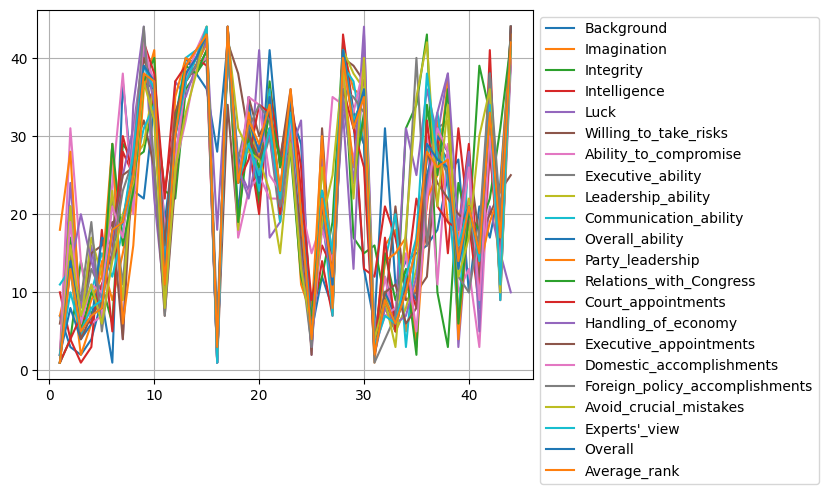

In [69]:
pres.plot().legend(bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()